In [108]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st



In [109]:
uber_file = "uber.csv"


In [110]:
# Load the CSV file  into a Pandas DataFrame
uber_file_df = pd.read_csv(uber_file) 

In [111]:
# Display sample data
uber_file_df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [112]:
# Rename the column
uber_file_df.rename(columns = {uber_file_df.columns[0]:"id"}, inplace = True)

In [113]:
uber_file_df.columns[0]

'id'

In [114]:
# Display sample data
uber_file_df.head()

,id,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [115]:
# Checking the shape of data
uber_file_df.shape

(200000, 9)

In [116]:
# Delete column "Key"
del uber_file_df["key"]

In [117]:
# Delete rows  with 0 longitude and longitude value

df2 = uber_file_df[ (uber_file_df['pickup_longitude'] == 0) & (uber_file_df['pickup_latitude'] == 0) & (uber_file_df['dropoff_longitude'] == 0) & (uber_file_df['dropoff_latitude'] == 0)].index
uber_file_df.drop(df2 , inplace=True)


uber_file_df.head(15)

,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
8,15822268,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1
10,2205147,6.5,2015-05-22 17:32:27 UTC,-73.974388,40.746952,-73.988586,40.729805,1


In [118]:
# Checking the shape of data after changes
uber_file_df.shape

(196413, 8)

In [119]:
# Delete rows  with 0 passengers and fare amount value
uber_file_df.drop(uber_file_df[uber_file_df['passenger_count'] == 0].index, inplace = True)
uber_file_df.drop(uber_file_df[uber_file_df['passenger_count'] == 208].index, inplace = True)
uber_file_df.drop(uber_file_df[uber_file_df['fare_amount'] == 0].index, inplace = True)

In [120]:
# Checking the shape of data after changes
uber_file_df.shape

(195716, 8)

In [121]:
# Creating new columns Month Date Day Hour Day of week
uber_file_df['pickup_datetime'] = pd.to_datetime(uber_file_df['pickup_datetime'])

uber_file_df['Year'] = uber_file_df['pickup_datetime'].apply(lambda time: time.year)
uber_file_df['Date'] = uber_file_df['pickup_datetime'].apply(lambda time: time.day)
uber_file_df['Hour'] = uber_file_df['pickup_datetime'].apply(lambda time: time.hour)
uber_file_df['Month'] = uber_file_df['pickup_datetime'].apply(lambda time: time.month)
uber_file_df['Day of Week'] = uber_file_df['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_file_df['Day of Week_number'] = uber_file_df['pickup_datetime'].apply(lambda time: time.dayofweek)
uber_file_df['counter'] = 1

days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
uber_file_df['Day of Week'] = uber_file_df['Day of Week'].map(days)

In [122]:
# Calculatin the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy
def haversine_np(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [123]:
uber_file_df['Distance']= haversine_np(uber_file_df['pickup_longitude'],uber_file_df['pickup_latitude'],
                             uber_file_df['dropoff_longitude'],uber_file_df['dropoff_latitude'])
# Rounding the values for better analysis
uber_file_df['Distance'] = uber_file_df['Distance'].astype(float).round(1)

In [154]:
uber_file_df.head(60)


,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Date,Hour,Month,Day of Week,Day of Week_number,counter,Distance
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,19,5,Thu,3,1,1.7
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,20,7,Fri,4,1,2.5
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,21,8,Mon,0,1,5.0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,8,6,Fri,4,1,1.7
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,17,8,Thu,3,1,4.5
6,48725865,24.5,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,2014,12,7,10,Sun,6,1,11.7
8,15822268,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2012,17,9,2,Fri,4,1,2.3
9,50611056,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,2012,29,19,3,Thu,3,1,4.9
10,2205147,6.5,2015-05-22 17:32:27+00:00,-73.974388,40.746952,-73.988586,40.729805,1,2015,22,17,5,Fri,4,1,2.2
12,31892535,3.3,2011-05-17 14:03:00+00:00,-73.966378,40.804440,-73.965890,40.807133,5,2011,17,14,5,Tue,1,1,0.3


Text(0, 0.5, 'fare_amount')

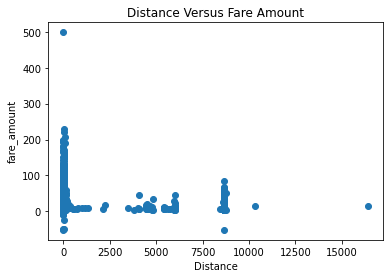

In [125]:
# Create a scater plot Distance vs Fare Amount
plt.scatter(uber_file_df['Distance'], uber_file_df['fare_amount'])
plt.title('Distance Versus Fare Amount')
plt.xlabel("Distance")
plt.ylabel("fare_amount")

Scatter plot shows trips with distances greater than 100km are outliers, so we should to remove them. Probably  the lat & lon entered were incorrect in such trips.
Also is necessary to remove trips with 0 distance travelled and rows with mismatched fair amount & distance travelled.

In [126]:
# Removing rows
uber_file_df.drop(uber_file_df[uber_file_df['Distance'] > 100].index, inplace = True)
uber_file_df.drop(uber_file_df[uber_file_df['Distance'] == 0].index, inplace = True)

In [127]:
uber_file_df.drop(uber_file_df[(uber_file_df['fare_amount']>100) & (uber_file_df['Distance']<1)].index, inplace = True )

In [128]:
# Checking the shape of data after changes
uber_file_df.shape

(192329, 16)

Text(0, 0.5, 'fare_amount')

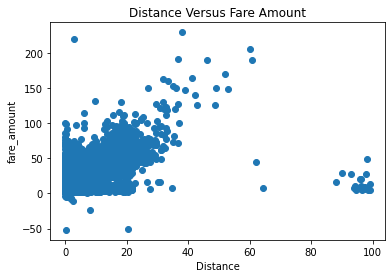

In [129]:
# Create a scater plot Distance vs Fare Amount after changes done on data frame
plt.scatter(uber_file_df['Distance'], uber_file_df['fare_amount'])
plt.title('Distance Versus Fare Amount')
plt.xlabel("Distance")
plt.ylabel("fare_amount")

After the changes the scatter plot looks more suitable. We can see that most of the fares are in distance beetwen 1 km - 40 km. 

Total fares number per year: 
[2009, 2010, 2011, 2012, 2013, 2014, 2015] [29575, 28999, 30207, 30846, 30300, 28995, 13407]


Text(0.5, 1.0, 'Total fares number per year')

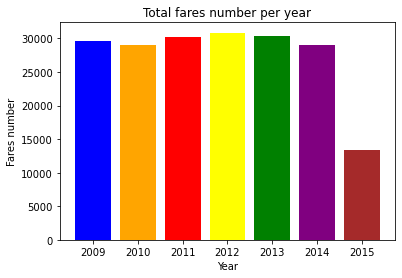

In [130]:
# Calculate total  fares number per year 
number_of_fares = []

year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = ['blue', 'orange', 'red', 'yellow', 'green', 'purple', 'brown']
for i in range(2009, 2016):
    x = uber_file_df.loc[uber_file_df['Year'] == i, 'counter'].sum()
    number_of_fares .append(x)

print("Total fares number per year: ")
print(year, number_of_fares )

# Create bar chart and  set the xlabel and ylabel

plt.bar(year, number_of_fares , color=colors)
plt.xlabel("Year")
plt.ylabel("Fares number")
plt.title("Total fares number per year")

The total fares number per year are similar each year. 
The biggest number of fares was in 2012. 
The smallest number is in 2015. This could be cause by not full year data provided in 2015. 


Total fares number per Month: 
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] [29575, 28999, 30207, 30846, 30300, 28995, 13407]


Text(0.5, 1.0, 'Total fares number per Month')

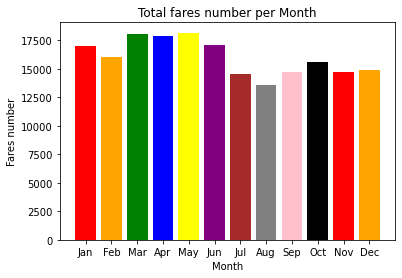

In [131]:
# Calculate total  fares number  per month
no_of_fares = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['red', 'orange', 'green', 'blue', 'yellow',
          'purple', 'brown', 'grey', 'pink', 'black']

for i in range(1, 13):
    x = uber_file_df.loc[uber_file_df['Month'] == i, 'counter'].sum()
    no_of_fares.append(x)

print("Total fares number per Month: ")
print(month, number_of_fares )

# Create bar chart and  set the xlabel and ylabel

plt.bar(month, no_of_fares, color=colors)
plt.xlabel("Month")
plt.ylabel("Fares number")
plt.title("Total fares number per Month")

The smallest total of fares per month is in July and August. 
Probaly this is because of summer holiday and people are going away from the city. 
Also the weather is very good so probably people prefer to walk.
The biggest number are beetwen March and May. 
This can suggest that when Spring starts people are going out more than in Winter time, but the weather is still not so warm like in the summer so people booking uber. 

Total fares number by Days: 
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [24201, 27063, 27925, 28880, 29695, 29126, 25439]


Text(0.5, 1.0, 'Total fares number by day')

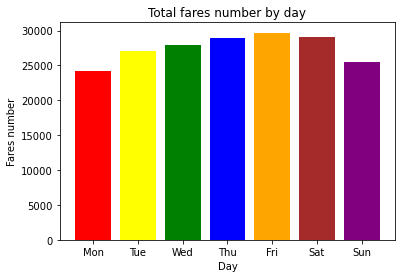

In [132]:
# Calculate total  fares number  per day
num_of_fares = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['red', 'yellow', 'green', 'blue', 'orange',
          'brown', 'purple']

for i in range(0, 7):
    x = uber_file_df.loc[uber_file_df['Day of Week_number'] == i, 'counter'].sum()
    num_of_fares.append(x)

print("Total fares number by Days: ")
print(day, num_of_fares)

# Create bar chart and  set the xlabel and ylabel

plt.bar(day, num_of_fares, color=colors)
plt.xlabel("Day")
plt.ylabel("Fares number")
plt.title("Total fares number by day")


The most busy days are Fridays and Saturdays. 
This suggest that people choose to book uber more on weekends when going out than on others weekdays.

Total fares number per pick up hour: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] [7560, 5665, 4240, 3113, 2270, 1875, 3966, 6963, 8764, 8993, 8635, 9035, 9563, 9615, 9415, 9227, 7954, 9356, 11611, 12114, 11327, 11023, 10621, 9424]


Text(0.5, 1.0, 'Total fares number per pick up hour')

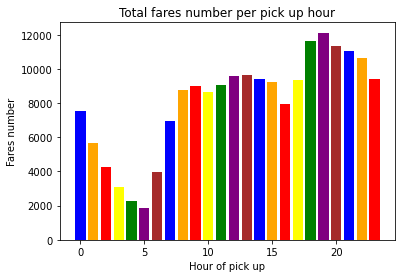

In [159]:
# Calculate total  fares number per pick up hour (00:00 - 23:00) 
number_of_fares = []

hour = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

colors = ['blue', 'orange', 'red', 'yellow', 'green', 'purple', 'brown', 'blue', 'orange', 'red', 'yellow', 'green', 'purple', 'brown', 'blue', 'orange', 'red', 'yellow', 'green', 'purple', 'brown', 'blue', 'orange', 'red']
for i in range(0, 24):
    x = uber_file_df.loc[uber_file_df['Hour'] == i, 'counter'].sum()
    number_of_fares .append(x)

print("Total fares number per pick up hour: ")
print(hour, number_of_fares )

# Create bar chart and  set the xlabel and ylabel

plt.bar(hour, number_of_fares , color=colors)
plt.xlabel("Hour of pick up")
plt.ylabel("Fares number")
plt.title("Total fares number per pick up hour")

From the chart above we see that the most busy pick up hours are evening hours between 18:00 - 22:00.

Text(0, 0.5, 'passenger_count')

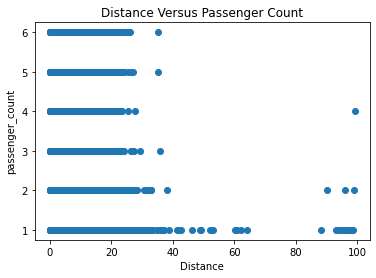

In [160]:
# Create a scater plot Distance vs passenger count 
plt.scatter(uber_file_df['Distance'], uber_file_df['passenger_count'])
plt.title('Distance Versus Passenger Count')
plt.xlabel("Distance")
plt.ylabel("passenger_count")

Total fares number by passengers: 
['1', '2', '3', '4', '5', '6'] [133464, 28476, 8604, 4132, 13508, 4145]


Text(0.5, 1.0, 'Total fares number per number of passengers')

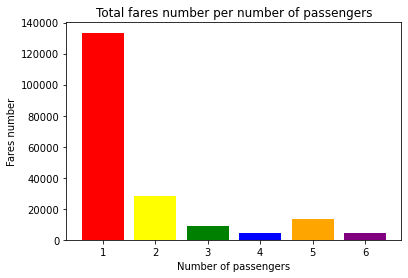

In [161]:
# Calculate total  fares number  per number of passengers
num_of_fares = []
passengers = ['1', '2', '3', '4', '5', '6']

colors = ['red', 'yellow', 'green', 'blue', 'orange',
         'purple']

for i in range(1, 7):
    x = uber_file_df.loc[uber_file_df['passenger_count'] == i, 'counter'].sum()
    num_of_fares.append(x)

print("Total fares number by passengers: ")
print(passengers, num_of_fares)

# Create bar chart and  set the xlabel and ylabel

plt.bar(passengers, num_of_fares, color=colors)
plt.xlabel("Number of passengers")
plt.ylabel("Fares number")
plt.title("Total fares number per number of passengers")

The above charts show that for most trips is one passenger. The smallest number of trips are trips with 4 or 6 passengers. 

In [162]:
# Calculate number of fares based on year and month 
year_trips = uber_file_df.groupby(['Year','Month']).agg(  
    no_of_trips = ('counter','count'),
    Average_fair = ('fare_amount','mean'),
    Total_fair = ('fare_amount','sum'),
    Average_passenger = ('passenger_count','mean'),
    Avg_distance = ( 'Distance', 'mean')).reset_index()

year_trips['avg_no_of_trips'] = year_trips['no_of_trips']/30



year_trips = year_trips.reset_index()

year_trips.head()

,index,Year,Month,no_of_trips,Average_fair,Total_fair,Average_passenger,Avg_distance,avg_no_of_trips
0,0,2009,1,2462,9.555118,23524.70,1.662063,3.122949,82.066667
1,1,2009,2,2228,9.639856,21477.60,1.687612,3.119524,74.266667
2,2,2009,3,2627,10.085097,26493.55,1.702322,3.252189,87.566667
3,3,2009,4,2496,10.071314,25138.00,1.644631,3.306771,83.200000
4,4,2009,5,2578,10.021703,25835.95,1.671451,3.314934,85.933333


In [163]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Average_fair')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
   
    plt.show()


The r-squared is: 0.5252853335998374
The correlation between both factors is 0.72


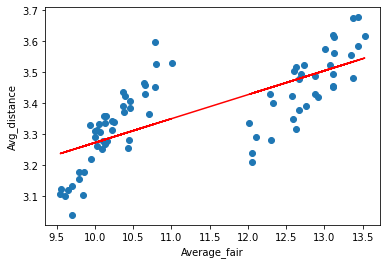

In [164]:
# Avg_distance vs. Average_fair Linear Regression Plot
x_values = year_trips["Average_fair"]
y_values = year_trips["Avg_distance"]
plot_linear_regression(x_values, y_values, 'Avg_distance',(1,20))

There is a strong positive correlation between average distance  and average fair amount. 
This make sense as the distance of trip increase, the price of the trip increase.
This suggests price can act as a key decesion making point while booking an uber.

The r-squared is: 0.012115889852473926
The correlation between both factors is -0.11


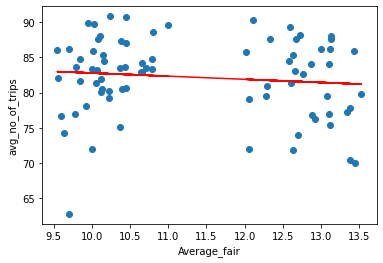

In [165]:
# Avg_distance vs. avg_no_of_trips Linear Regression Plot
x_values = year_trips["Average_fair"]
y_values = year_trips["avg_no_of_trips"]
plot_linear_regression(x_values, y_values, 'avg_no_of_trips',(6,90))

Correlation is weak, so this may suggest that there is no correlation, with potential outliers affecting the linear regression.